# Install and import

In [8]:
import os
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

## Create dataframes

In [9]:
# define the directory where the .xlsx files are located
directory = '/home/dafbajaro/lacuna-fund-climate-health/data/pacsii_data'

# find all .xlsx files in the directory
xlsx_files = glob.glob(os.path.join(directory, '*.xlsx'))

# task 1: Get the second sheet from each .xlsx file and save as CSV with the same name
for file_path in xlsx_files:
    file_name = os.path.basename(file_path)  # Extract the file name from the full path
    file_name_without_extension = os.path.splitext(file_name)[0]

    # read the .xlsx file using pd.ExcelFile
    xl = pd.ExcelFile(file_path)
    sheet_names = xl.sheet_names

    if len(sheet_names) >= 2:
        second_sheet_name = sheet_names[1]  # Get the second sheet name
        df = xl.parse(second_sheet_name, engine='openpyxl')

        # Save the extracted sheet as a CSV with the same name in the same directory
        df.to_csv(os.path.join(directory, f"{file_name_without_extension}.csv"), index=False)

# task 2: Open CSVs as separate pandas DataFrames, each named after the file
csv_files = glob.glob(os.path.join(directory, '*.csv'))

dataframes = {}  # Dictionary to store DataFrames with file names as keys
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    file_name_without_extension = os.path.splitext(file_name)[0]

    # read the CSV into a DataFrame and use the file name as the DataFrame name
    dataframes[file_name_without_extension] = pd.read_csv(file_path)

# loop through the dataframes and print their names, columns, and number of columns
for df_name, df in dataframes.items():
    print(f"Dataframe name: {df_name}")
    print(f"Columns: {list(df.columns)}")
    print(f"Number of columns: {len(df.columns)}")
    print(f"-----------------------")

    # Create pandas DataFrame for each dataset
    globals()[df_name] = pd.DataFrame(df)

Dataframe name: muntinlupa_sucat
Columns: ['row_no', 'region_code', 'region_name', 'province_code', 'province_name', 'municipality_code', 'municipality_name', 'baranggay_code', 'baranggay_name', 'date_encoded', 'date_of_survey', 'structure_id', 'educational_attainment', 'occupancy_type', 'structure_type', 'n_floors', 'structure_occupancy_type', 'n_family_in_structure', 'n_individuals_in_structure', 'n_family_members', 'n_family_members_male', 'n_family_members_female', 'n_family_members_student', 'n_family_members_sc', 'n_family_members_pwd', 'occupation1', 'occupation2', 'occupation3', 'power_source_type', 'water_supply_type_1', 'water_supply_type_2', 'water_supply_type_3', 'water_supply_type_4', 'water_supply_type_5', 'has_toilets_functioning', 'n_toilets', 'n_toilets_functioning', 'income_actual_1', 'income_bracket', 'has_private_savings', 'has_community_savings', 'has_insurance', 'insurance_type_1', 'insurance_type_2', 'insurance_type_3', 'insurance_type_4']
Number of columns: 46
-

/home/dafbajaro/miniconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## List unique columns

In [10]:
# create a set of all columns present in the first DataFrame
all_columns = set(dataframes[next(iter(dataframes))].columns)

# create a dictionary to store unique columns for each DataFrame
unique_columns = {df_name: set(df.columns) - all_columns for df_name, df in dataframes.items()}

# print the unique columns for each DataFrame
for df_name, unique_cols in unique_columns.items():
    print(f"Dataframe name: {df_name}")
    if unique_cols:
        print(f"Unique columns: {unique_cols}")
    else:
        print("Unique columns: None")
    print("-----------------------")

Dataframe name: muntinlupa_sucat
Unique columns: None
-----------------------
Dataframe name: iloilo
Unique columns: {'income_actual_8', 'income_actual_6', 'income_actual_4', 'income_actual_7', 'income_actual_3', 'income_actual_5', 'income_actual_2'}
-----------------------
Dataframe name: muntinlupa_alabang
Unique columns: None
-----------------------
Dataframe name: davao
Unique columns: None
-----------------------


### Rename columns

No need for this anymore. This has been corrected by PACSII.

In [4]:
# define the column renaming instructions as a list of tuples
#renaming_instructions = [
#    ('muntinlupa_sucat', {'income_actual': 'income_actual_1'}),
#    ('muntinlupa_alabang', {'income_actual': 'income_actual_1'}),
#    ('davao', {
#        'occupation_1': 'occupation1',
#        'occupation_2': 'occupation2',
#        'occupation_3': 'occupation3',
#        'income_actual': 'income_actual_1'
#    })
#]

# loop through the renaming instructions and rename the columns in each DataFrame
#for df_name, column_mapping in renaming_instructions:
#    dataframes[df_name].rename(columns=column_mapping, inplace=True)

### Check that there are no unique columns

Apart from `iloilo` with various `income_actual_x`

In [11]:
# create a set of all columns present in the first DataFrame
all_columns = set(dataframes[next(iter(dataframes))].columns)

# create a dictionary to store unique columns for each DataFrame
unique_columns = {df_name: set(df.columns) - all_columns for df_name, df in dataframes.items()}

# print the unique columns for each DataFrame
for df_name, unique_cols in unique_columns.items():
    print(f"Dataframe name: {df_name}")
    if unique_cols:
        print(f"Unique columns: {unique_cols}")
    else:
        print("Unique columns: None")
    print("-----------------------")

Dataframe name: muntinlupa_sucat
Unique columns: None
-----------------------
Dataframe name: iloilo
Unique columns: {'income_actual_8', 'income_actual_6', 'income_actual_4', 'income_actual_7', 'income_actual_3', 'income_actual_5', 'income_actual_2'}
-----------------------
Dataframe name: muntinlupa_alabang
Unique columns: None
-----------------------
Dataframe name: davao
Unique columns: None
-----------------------


# Merge tables

In [12]:
# create an empty list to store the modified DataFrames
dataframes_with_source = []

# Loop through the original dataframes dictionary and add a new column 'file' with the DataFrame name
for df_name, df in dataframes.items():
    df['file'] = df_name
    dataframes_with_source.append(df)

# Concatenate the DataFrames vertically (append them together)
merged_df = pd.concat(dataframes_with_source, ignore_index=True)

# Reorder the columns to have 'file' as the first column
merged_df = merged_df[['file'] + [col for col in merged_df.columns if col != 'file']]
merged_df

,file,row_no,region_code,region_name,province_code,province_name,municipality_code,municipality_name,baranggay_code,baranggay_name,...,insurance_type_2,insurance_type_3,insurance_type_4,income_actual_2,income_actual_3,income_actual_4,income_actual_5,income_actual_6,income_actual_7,income_actual_8
0,muntinlupa_sucat,1,PH130000000,National Capital Region,PH137600000,"NCR, Fourth District",PH137603000,City of Muntinlupa,PH137603005,Poblacion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,muntinlupa_sucat,2,PH130000000,National Capital Region,PH137600000,"NCR, Fourth District",PH137603000,City of Muntinlupa,PH137603005,Poblacion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,muntinlupa_sucat,3,PH130000000,National Capital Region,PH137600000,"NCR, Fourth District",PH137603000,City of Muntinlupa,PH137603005,Poblacion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,muntinlupa_sucat,4,PH130000000,National Capital Region,PH137600000,"NCR, Fourth District",PH137603000,City of Muntinlupa,PH137603005,Poblacion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,muntinlupa_sucat,5,PH130000000,National Capital Region,PH137600000,"NCR, Fourth District",PH137603000,City of Muntinlupa,PH137603005,Poblacion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21793,davao,2459,PH110000000,Region XI,PH112400000,Davao del Sur,PH112402000,Davao City,PH112402077,Matina Pangi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21794,davao,2460,PH110000000,Region XI,PH112400000,Davao del Sur,PH112402000,Davao City,PH112402077,Matina Pangi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21795,davao,2461,PH110000000,Region XI,PH112400000,Davao del Sur,PH112402000,Davao City,PH112402077,Matina Pangi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21796,davao,2462,PH110000000,Region XI,PH112400000,Davao del Sur,PH112402000,Davao City,PH112402077,Matina Pangi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Quick checks

## Number of rows per `file`

In [13]:
# count occurrences per row in the 'file' column
file_counts = merged_df['file'].value_counts()
file_counts

muntinlupa_sucat      9662
muntinlupa_alabang    8387
davao                 2463
iloilo                1286
Name: file, dtype: int64

## Missing rows

In [14]:
# Get all unique values in the 'file' column
unique_files = merged_df['file'].unique()

# Function to check for missing rows for a specific 'file' value
def check_missing_rows(file_value):
    # Filter the DataFrame for the current 'file' value
    filtered_data = merged_df[merged_df['file'] == file_value]

    # Get the minimum and maximum row_no values for the filtered data
    min_row_no = filtered_data['row_no'].min()
    max_row_no = filtered_data['row_no'].max()

    # Create a sequence of consecutive row_no values from the minimum to maximum
    consecutive_row_no = set(range(min_row_no, max_row_no + 1))

    # Get the set of row_no values from the filtered data
    existing_row_no = set(filtered_data['row_no'])

    # Find the skipped row_no values by subtracting existing row_no values from consecutive row_no values
    skipped_row_no = consecutive_row_no - existing_row_no

    if skipped_row_no:
        print(f"Skipped row_no values for file '{file_value}':")
        print(skipped_row_no)
    else:
        print(f"No `row_no` values are skipped for file '{file_value}'.")

# Loop through each unique 'file' value and check for missing rows
for file_value in unique_files:
    check_missing_rows(file_value)

No `row_no` values are skipped for file 'muntinlupa_sucat'.
No `row_no` values are skipped for file 'iloilo'.
No `row_no` values are skipped for file 'muntinlupa_alabang'.
No `row_no` values are skipped for file 'davao'.


# Exploratory Data Analysis

## Overall

### Data types

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21798 entries, 0 to 21797
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   file                        21798 non-null  object 
 1   row_no                      21798 non-null  int64  
 2   region_code                 21798 non-null  object 
 3   region_name                 21798 non-null  object 
 4   province_code               21798 non-null  object 
 5   province_name               21798 non-null  object 
 6   municipality_code           21798 non-null  object 
 7   municipality_name           21798 non-null  object 
 8   baranggay_code              21798 non-null  object 
 9   baranggay_name              21798 non-null  object 
 10  date_encoded                21798 non-null  object 
 11  date_of_survey              21798 non-null  object 
 12  structure_id                21798 non-null  object 
 13  educational_attainment      542

### Unique values

In [16]:
# Create a dictionary to store unique values for each column
unique_values = {}

# Loop through each column in the merged_df DataFrame and get the unique values
for column in merged_df.columns:
    if column not in ['row_no', 'structure_id']:
        column_values = merged_df[column].unique()

        # Check if the values are numeric, then sort them from smallest to largest
        if all(isinstance(value, (int, float)) for value in column_values):
            unique_values[column] = sorted(column_values)
        else:  # If not numeric, sort alphabetically
            unique_values[column] = sorted(column_values, key=str)

# Printing the unique values for each column (excluding 'row_no' and 'structure_id')
for column, values in unique_values.items():
    print(f"{column}:")
    print(values)
    print()

file:
['davao', 'iloilo', 'muntinlupa_alabang', 'muntinlupa_sucat']

region_code:
['PH060000000', 'PH110000000', 'PH130000000']

region_name:
['National Capital Region', 'Region VI', 'Region XI']

province_code:
['PH063000000', 'PH112400000', 'PH137600000']

province_name:
['Davao del Sur', 'Iloilo', 'NCR, Fourth District']

municipality_code:
['PH063022000', 'PH112402000', 'PH137603000']

municipality_name:
['City of Muntinlupa', 'Davao City', 'Iloilo City']

baranggay_code:
['PH063022072', 'PH112402010', 'PH112402058', 'PH112402074', 'PH112402075', 'PH112402077', 'PH112402142', 'PH112402176', 'PH112402179', 'PH112402186', 'PH137603001', 'PH137603003', 'PH137603004', 'PH137603005', 'PH137603007']

baranggay_name:
['Alabang', 'Bago Aplaya', 'Baliok', 'Barangay 9-A (Pob.)', 'Buli', 'Centro (San Juan)', 'Cupang', 'Ingore', 'Lapu-Lapu', 'Los Amigos', 'Matina Aplaya', 'Matina Crossing', 'Matina Pangi', 'Poblacion', 'Sucat']

date_encoded:
['2023-05-04', '2023-05-05', '2023-05-08', '2023-05

## `Float`

### Descriptive stats

In [17]:
merged_df.describe()

,row_no,n_floors,n_family_in_structure,n_individuals_in_structure,n_family_members,n_family_members_male,n_family_members_female,n_family_members_student,n_family_members_sc,n_family_members_pwd,has_toilets_functioning,n_toilets,n_toilets_functioning,has_private_savings,has_community_savings,has_insurance
count,21798.000000,20008.000000,15162.000000,15145.000000,21500.000000,21413.000000,21397.000000,18605.000000,19364.000000,19568.000000,15421.000000,20003.000000,16093.000000,11168.000000,7452.000000,5440.000000
mean,3932.424443,1.461265,1.575122,6.084450,4.283395,2.165834,2.123382,1.201666,0.192884,0.036182,0.820764,1.009949,0.991549,0.290831,0.078905,0.468199
std,2759.716555,0.564967,1.194300,4.598794,2.257858,1.417646,1.391597,1.316243,0.491763,0.228136,0.383562,0.543067,0.540254,0.454166,0.269609,0.499034
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1388.250000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3575.500000,1.000000,1.000000,5.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,6300.000000,2.000000,2.000000,7.000000,5.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,9662.000000,3.000000,36.000000,56.000000,31.000000,16.000000,25.000000,10.000000,6.000000,5.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000


### Non-integer values

In [18]:
# Select only the FLOAT columns from the DataFrame
float_columns = merged_df.select_dtypes(include='float').columns

# Variable to keep track if any non-integer value is found
found_non_integer = False

# Dictionary to store the columns with decimal values
columns_with_decimals = {}

# Check for decimal values in each FLOAT column
for column in float_columns:
    non_nan_values = merged_df[column][~merged_df[column].isnull()]
    decimal_values = non_nan_values[non_nan_values % 1 != 0]
    if not decimal_values.empty:
        found_non_integer = True
        columns_with_decimals[column] = decimal_values

# Print the columns with decimal values or "No non-integer values from FLOAT columns."
if found_non_integer:
    for column, values in columns_with_decimals.items():
        print(f"Column '{column}' has the following decimal values:")
        print(values)
        print("------------------------")
else:
    print("No non-integer values from FLOAT columns.")

No non-integer values from FLOAT columns.


### Histograms

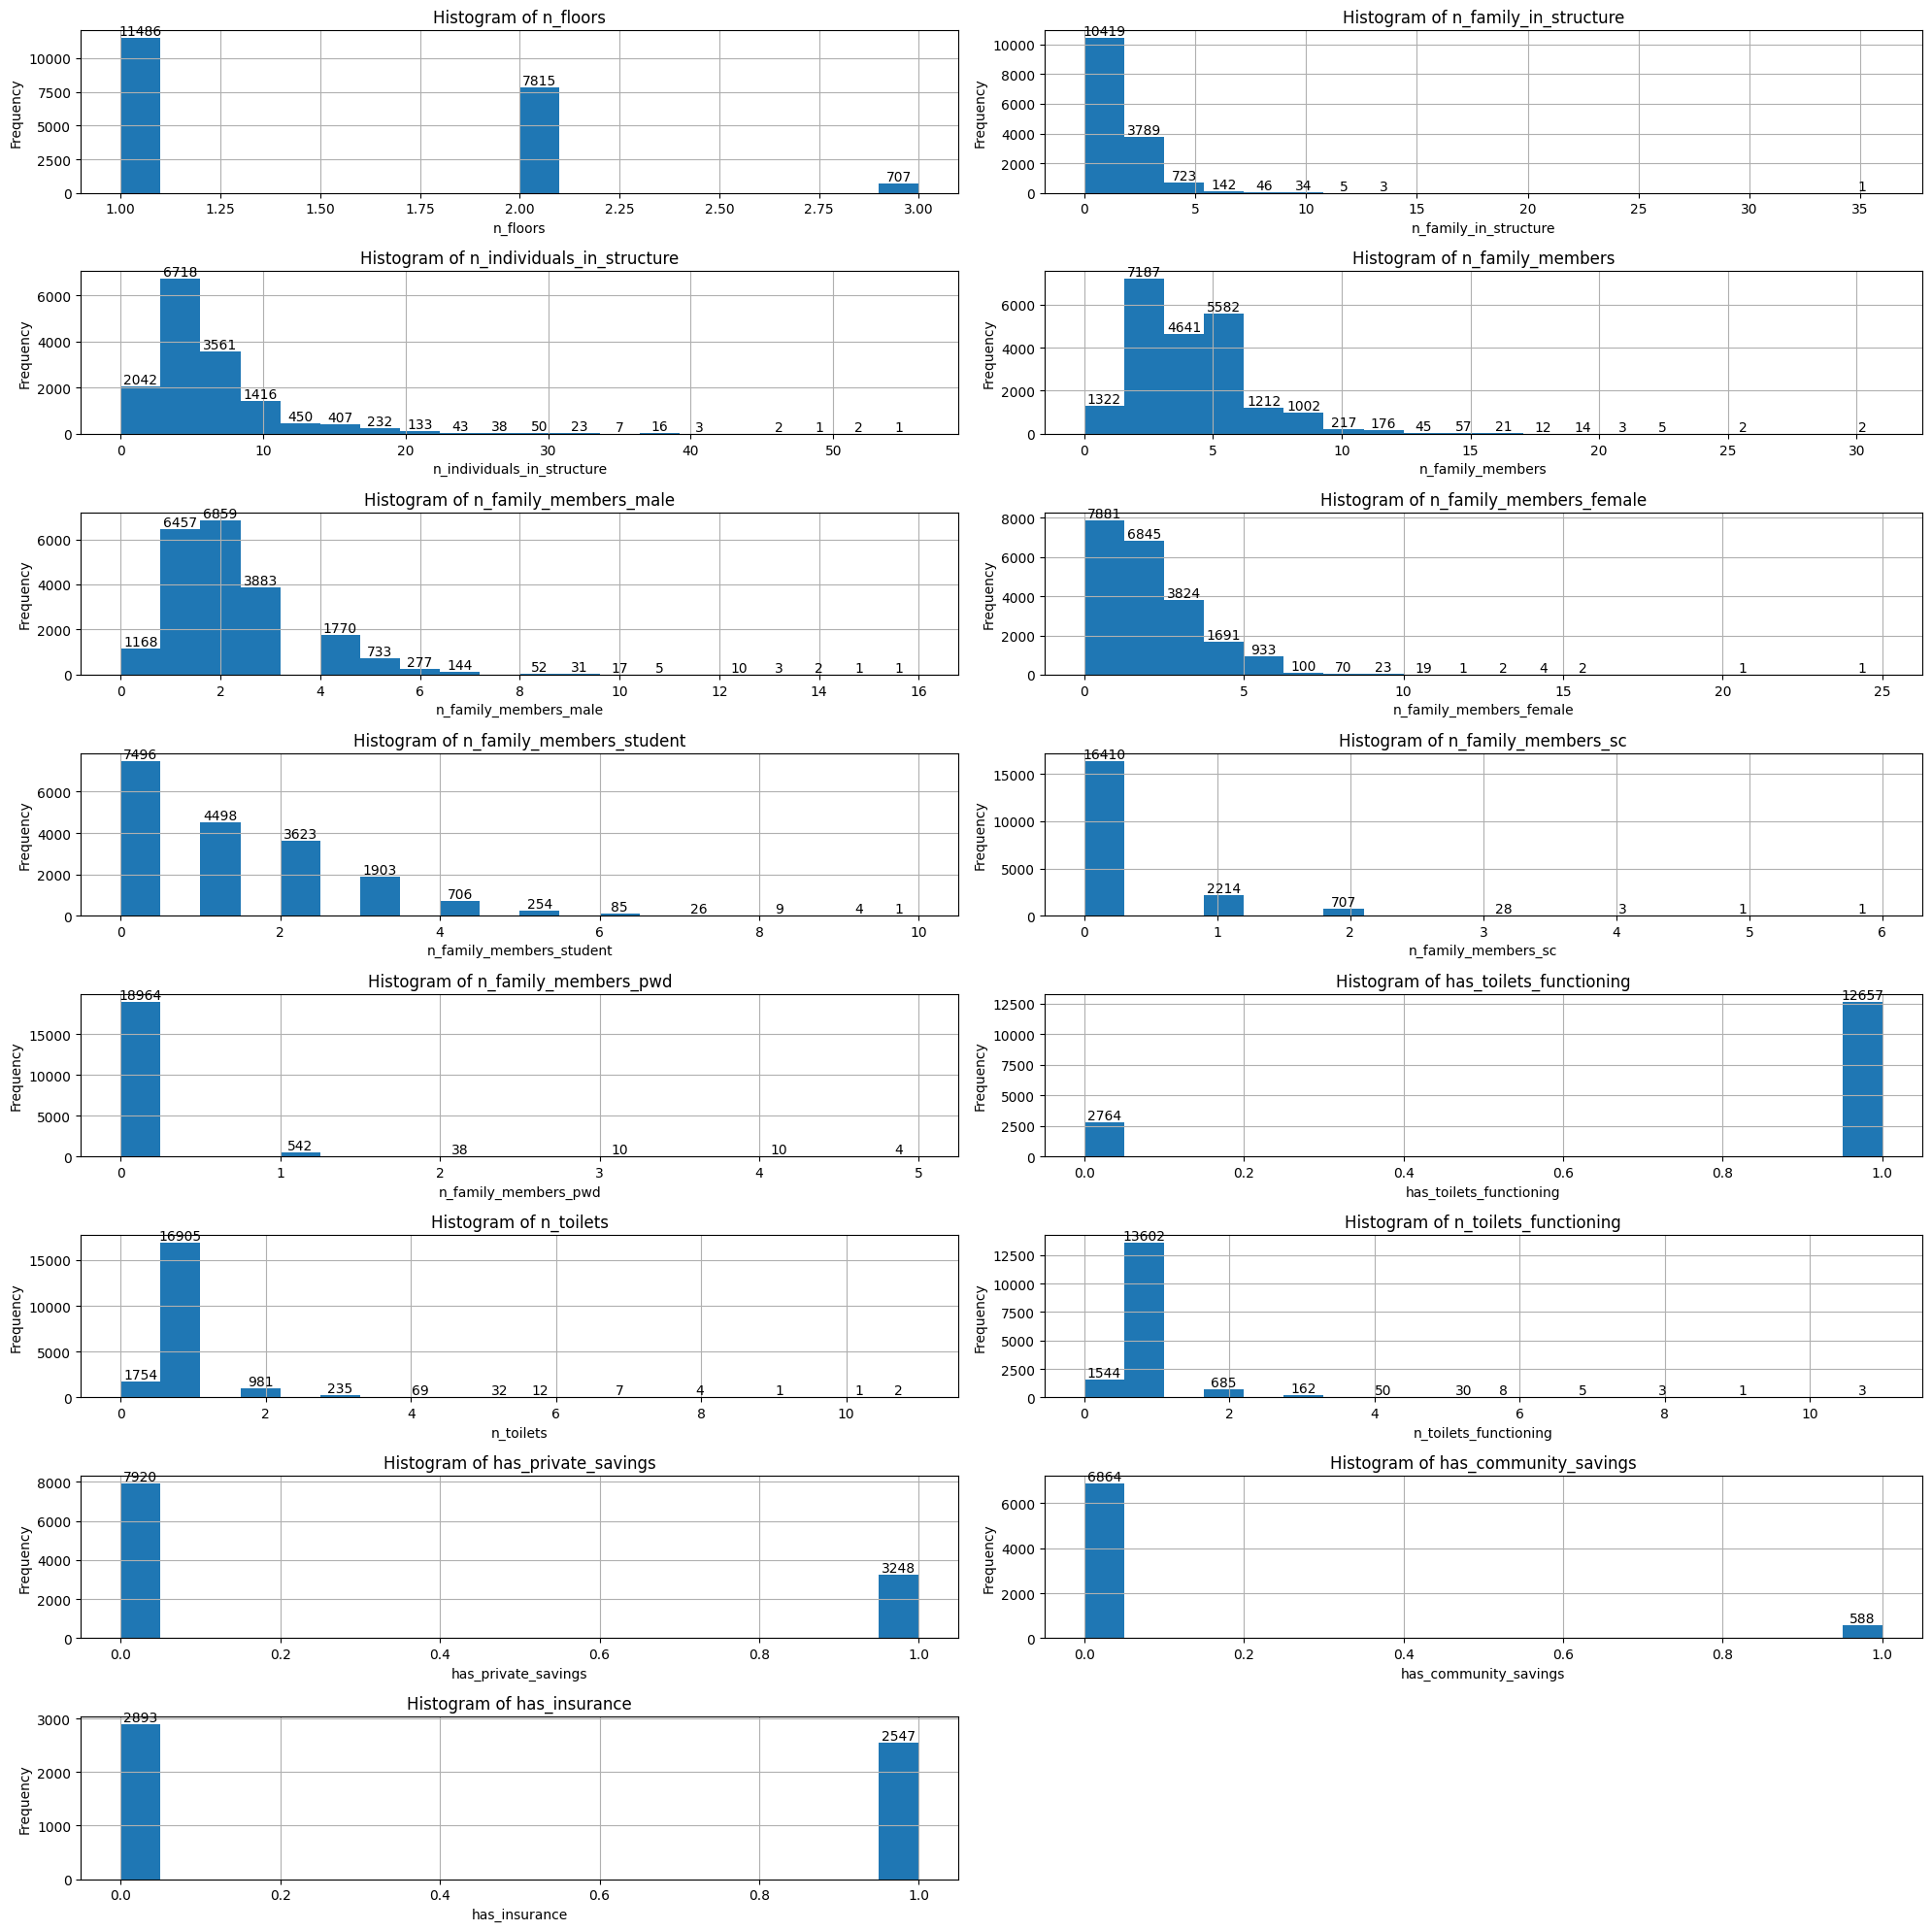

In [19]:
# Select only the FLOAT columns from the DataFrame
float_columns = merged_df.select_dtypes(include='float').columns

# Calculate the number of rows and columns required for the grid layout
num_rows = (len(float_columns) - 1) // 2 + 1
num_cols = min(2, len(float_columns))

# Create a compiled figure with subplots for each FLOAT column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axs array if necessary
if len(float_columns) > 1:
    axs = axs.flatten()

# Plot histograms and display numbers on top of bars for each FLOAT column
for i, column in enumerate(float_columns):
    values, bins, _ = axs[i].hist(merged_df[column], bins=20)  # Adjust the number of bins as needed
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

    # Display numbers on top of each bar
    for value, bin_edge in zip(values, bins):
        if value > 0:
            axs[i].text(bin_edge + 0.5*(bins[1]-bins[0]), value, str(int(value)), ha='center', va='bottom')

# Remove any unused subplots in the case of an odd number of columns
if len(float_columns) < num_rows * num_cols:
    for j in range(len(float_columns), num_rows * num_cols):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Percentage of null values

In [20]:
# Calculate the percentage of null/NaN values in each float column of the merged_df DataFrame
null_percentage = (merged_df.select_dtypes(include='float').isnull().sum() / len(merged_df)) * 100

# Print the result
print("Percentage of null/NaN values in float columns:")
print(null_percentage)

Percentage of null/NaN values in float columns:
n_floors                       8.211763
n_family_in_structure         30.443160
n_individuals_in_structure    30.521149
n_family_members               1.367098
n_family_members_male          1.766217
n_family_members_female        1.839618
n_family_members_student      14.648133
n_family_members_sc           11.166162
n_family_members_pwd          10.230296
has_toilets_functioning       29.254978
n_toilets                      8.234700
n_toilets_functioning         26.172126
has_private_savings           48.765942
has_community_savings         65.813377
has_insurance                 75.043582
dtype: float64


## `String`

### Unique values

In [21]:
# Select only the STRING columns from the DataFrame (excluding 'structure_id')
string_columns = merged_df.select_dtypes(include='object').columns
string_columns = string_columns.drop('structure_id', errors='ignore')

# Loop through each STRING column, list its unique values (arranged alphabetically)
for column in string_columns:
    unique_values = merged_df[column].dropna().unique().tolist()  # Convert unique values to a list of strings
    unique_values.sort()  # Sort the unique values alphabetically
    print(f"Unique values for '{column}':")
    print(unique_values)
    print("------------------------")

Unique values for 'file':
['davao', 'iloilo', 'muntinlupa_alabang', 'muntinlupa_sucat']
------------------------
Unique values for 'region_code':
['PH060000000', 'PH110000000', 'PH130000000']
------------------------
Unique values for 'region_name':
['National Capital Region', 'Region VI', 'Region XI']
------------------------
Unique values for 'province_code':
['PH063000000', 'PH112400000', 'PH137600000']
------------------------
Unique values for 'province_name':
['Davao del Sur', 'Iloilo', 'NCR, Fourth District']
------------------------
Unique values for 'municipality_code':
['PH063022000', 'PH112402000', 'PH137603000']
------------------------
Unique values for 'municipality_name':
['City of Muntinlupa', 'Davao City', 'Iloilo City']
------------------------
Unique values for 'baranggay_code':
['PH063022072', 'PH112402010', 'PH112402058', 'PH112402074', 'PH112402075', 'PH112402077', 'PH112402142', 'PH112402176', 'PH112402179', 'PH112402186', 'PH137603001', 'PH137603003', 'PH1376030

### Bar graphs

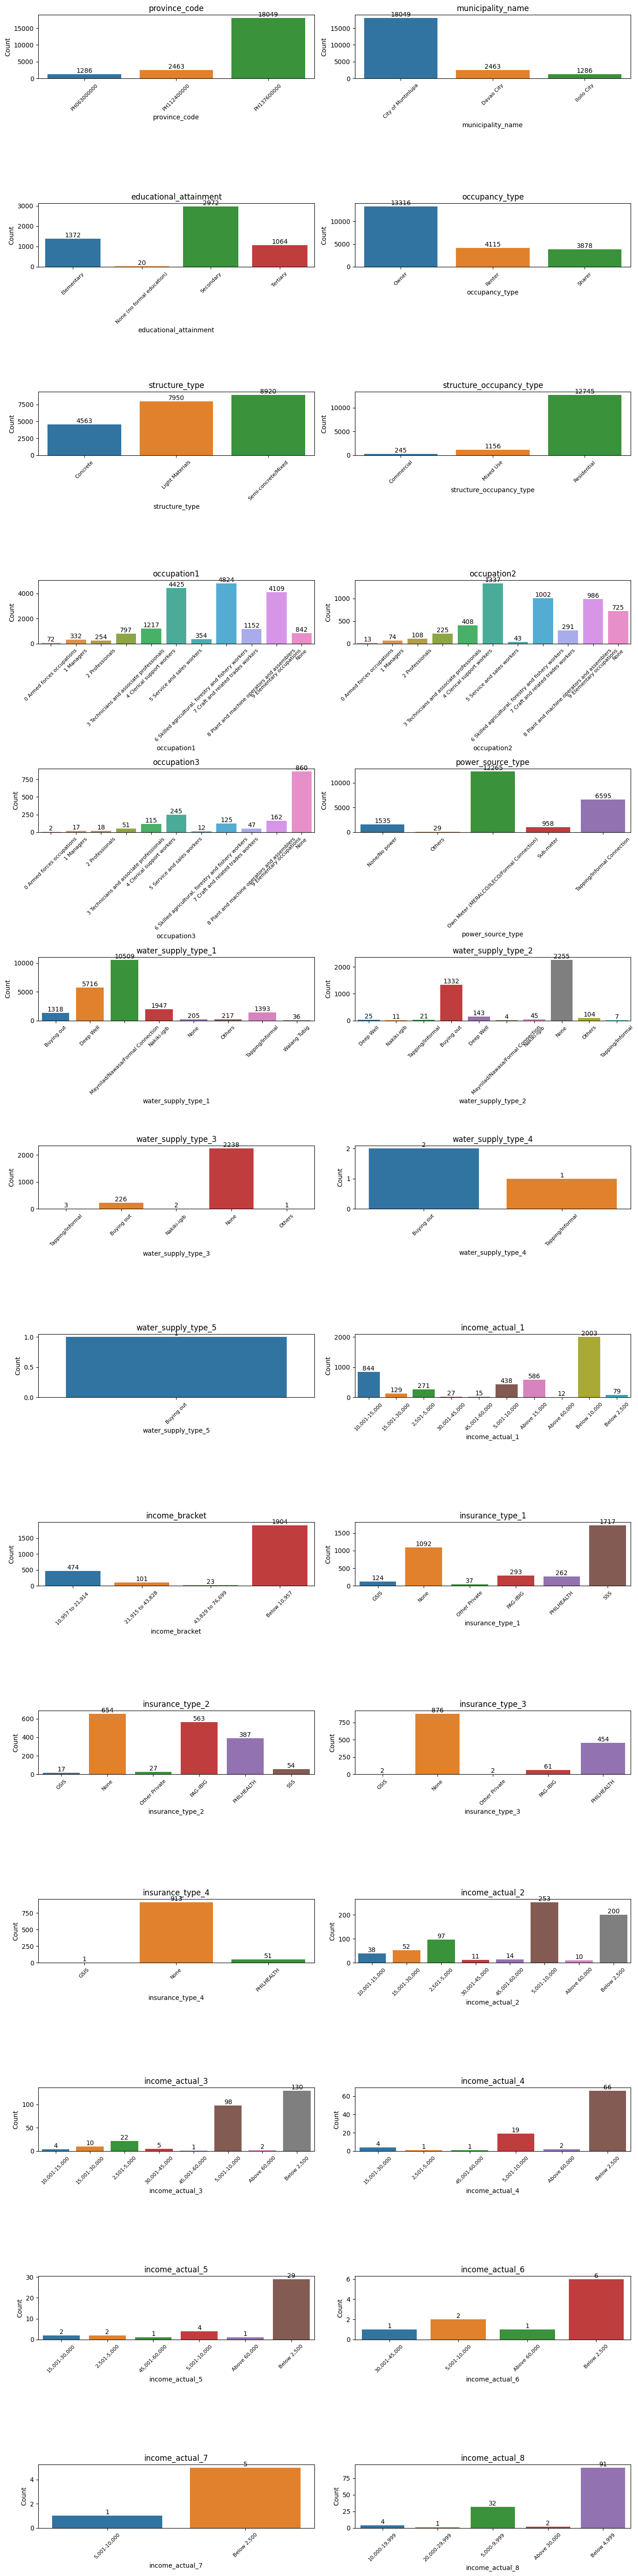

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the STRING columns from the DataFrame (excluding specified columns)
exclude_columns = ['file', 'region_code', 'region_name', 'province_name',
                   'municipality_code', 'baranggay_code', 'baranggay_name', 'date_encoded',
                   'date_of_survey', 'structure_id']
string_columns = merged_df.select_dtypes(include='object').columns.drop(exclude_columns)

# Define the figure size based on the number of rows and columns in the string_columns
num_rows = (len(string_columns) - 1) // 2 + 1
num_cols = min(2, len(string_columns))
fig_width = 7 * num_cols
fig_height = 4 * num_rows

# Create a compiled figure with subplots for each STRING column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axs array if necessary
if len(string_columns) > 1:
    axs = axs.flatten()

# Plot bar graphs for each STRING column
for i, column in enumerate(string_columns):
    counts = merged_df[column].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts, ax=axs[i])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

    # Add numbers on top of the bars
    for index, value in enumerate(counts):
        axs[i].text(index, value, str(value), ha='center', va='bottom')

    # Reduce the font size of x-axis labels
    axs[i].tick_params(axis='x', labelsize=8)

# Adjust spacing of x-axis labels directly below the tick
plt.tight_layout()

# Remove any unused subplots in the case of an odd number of columns
if len(string_columns) < num_rows * num_cols:
    for j in range(len(string_columns), num_rows * num_cols):
        fig.delaxes(axs[j])

plt.show()

### Percentage of null values

In [23]:
# Calculate the percentage of null/NaN values in each string column of the merged_df DataFrame
string_null_percentage = (merged_df.select_dtypes(include='object').isnull().sum() / len(merged_df)) * 100

# Print the result
print("Percentage of null/NaN values in string columns:")
print(string_null_percentage)

Percentage of null/NaN values in string columns:
file                         0.000000
region_code                  0.000000
region_name                  0.000000
province_code                0.000000
province_name                0.000000
municipality_code            0.000000
municipality_name            0.000000
baranggay_code               0.000000
baranggay_name               0.000000
date_encoded                 0.000000
date_of_survey               0.000000
structure_id                 0.000000
educational_attainment      75.098633
occupancy_type               2.243325
structure_type               1.674466
structure_occupancy_type    35.104138
occupation1                 15.689513
occupation2                 76.089549
occupation3                 92.412148
power_source_type            1.908432
water_supply_type_1          2.096523
water_supply_type_2         81.892834
water_supply_type_3         88.668685
water_supply_type_4         99.986237
water_supply_type_5         99.995412
i